# Reading and visualizing gpx data

First we will install `gpxpy` for parsing out location data from the gpx file

In [ ]:
! pip install gpxpy

Next let's import `gpxpy` for handling the gpx file, `minidom` for parsing heart rate data from the gpx file, `pandas` and `numpy` for dealing with the data, and `matplotlib` to visualize the data

In [1]:
import gpxpy #import gpxpy to read in the gpx data 
from xml.dom import minidom #for parsing out heart rate data

import pandas as pd #organize the data
import numpy as np #making arrays

import matplotlib.pyplot as plt #vizualize the data
%matplotlib inline

### Parsing the data
Now let's open the data and then parse it with `gpxpy`. The data came from a bike ride I went on last fall and has location, elevation, and heart rate data

In [2]:
gpx_file = open('ride.gpx', 'r') #open the gpx file and assign it to a variable
gpx = gpxpy.parse(gpx_file) #parse the gpx file to a variable

These lists are all empty but we will fill them in with the parsed data shortly. We are after latitude, longitude, elevation, and time for each point

In [3]:
lat = [] #empty list for latitude
lon = [] #empty list for longitude
elevation = [] #empty list for elevation
time = [] #empty list for timestamp

Some serious nesting of the data in the gpx file, but we can get it out. We are appending location, elevation, and time for each and every point in the file

In [4]:
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude) #build a list of latitude for the points
            lon.append(point.longitude) #build a list of longitude for the points
            elevation.append(point.elevation) #build a list of elevation for the points
            time.append(point.time) #build a list of timestamps for the points

Also buried in this `gpx` file is some heart rate data that was collected during the ride. Here I use minidom to parse out the heart rate data. What it is doing is pulling all the xml tags by the name `gpxtpx:hr` and making a list of them that we then parse through to make a list of heart rate values

In [5]:
#parse the gpx data like it's an html file
xmldoc = minidom.parse('ride.gpx')
#we are looking for the tag 'gpxtpx:hr' since it has heart rate data
hrlist = xmldoc.getElementsByTagName('gpxtpx:hr')
hr = [] #empty list for heart rate
#build the heart rate list
for beat in hrlist:
    hr.append(int(beat.firstChild.nodeValue))

### Creating secondary data
With these lists we can make some secondary data. Here I use `np.diff` to create a list of local slope and distance between every point. 

In [6]:
#difference the elevation from point to point gives us the elevation change. pad to keep same length
slope = list(np.pad(np.diff(elevation), (0,1), 'constant')) 
#calculate the distance between sequential points. pad to keep same length
distance = np.pad(np.sqrt((np.diff(lat)**2)+(np.diff(lon)**2)), (0,1), 'minimum')

### Organizing the data
We have a bunch of lists with our data for location, elevation, heart rate, time, slope, and distance. It is easiest to deal with this in a pandas `DataFrame` so let's create one with a dictionary below

In [7]:
#create a dataframe
data = pd.DataFrame({'latitude': lat, 'longitude': lon, 'elevation': elevation, 'heart': hr, 'time': time, 'slope': slope, 'distance': distance})
data.replace(np.inf, 0, inplace=True)

### Visualize the data
Now that the data is all organized, let's visualize the ride with a scatter plot. We will use `longitude` for our x-value, and `latitude` for our y-value, then for fun let's color each point by `heart` value so that darker colors symbolize a higher heart rate. Lastly, let's also make the size of each point proportional to the absolute value of the local slope (and multiply by 100 so we can see changes in size). Areas with no points are flat because the local slope is zero. Steeper slopes have bigger points.

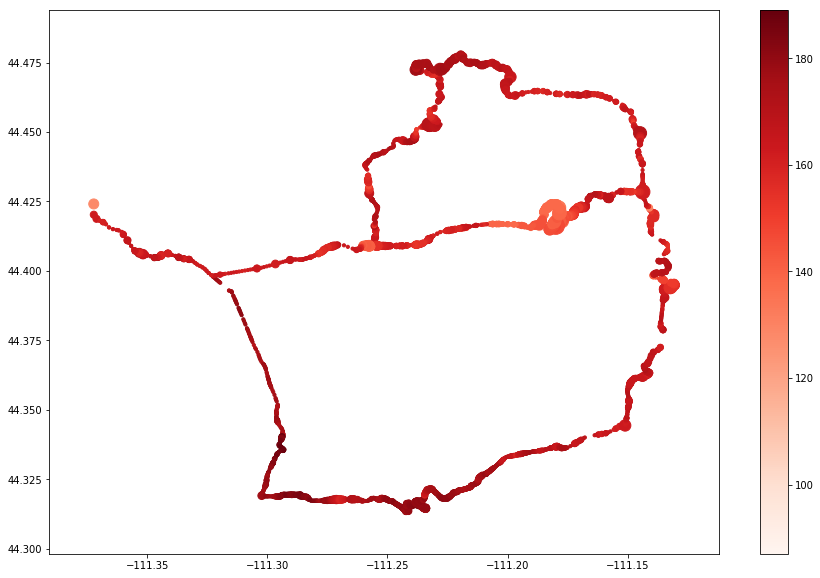

In [8]:
fig = plt.figure(figsize=(15,10)) #set the figure size
#then plot the points, color them, and give them a size
sc = plt.scatter(data.longitude, data.latitude, c=data.heart, s=abs(data.slope)*100, cmap='Reds')
plt.colorbar(sc) #add a color bar as well

### And there you have it!
We took a gpx file, parsed through it and extracted location and heart rate data using `gpxpy` and `minidom`. Then we made secondary distance and slope data using `numpy`, and organized it all in `pandas`. Finally we used `matplotlib` to visuzalize the data in a semi-spatial manner and see how heart rate and local slope changed throughout the ride. This is just the jumping off point to a bunch of other fun analytics that you could do with this data.

This notebook is licensed as CC-BY, use and share to your hearts content.